# PRCL-0017-NO-CHURN 

#### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Step 1: Connect to MySQL and Load Data
db_connection = mysql.connector.connect(
    host="18.136.157.135",
    user="dm_team3",
    password="DM!$!Team!27@9!20&",
    database="project_telecom"
)
cursor = db_connection.cursor()
cursor.execute("SELECT * FROM telecom_churn_data")
columns = [col[0] for col in cursor.description]
data = cursor.fetchall()
df = pd.DataFrame(data, columns=columns)
cursor.close()
db_connection.close()

#### Understanding Dataset

In [8]:
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [10]:
new_column_names = {
    "columns1": "State",
    "columns2": "Account Length",
    "columns3": "Area Code",
    "columns4": "Phone",
    "columns5": "International Plan",
    "columns6": "VMail Plan",
    "columns7": "VMail Message",
    "columns8": "Day Mins",
    "columns9": "Day Calls",
    "columns10": "Day Charge",
    "columns11": "Eve Mins",
    "columns12": "Eve Calls",
    "columns13": "Eve Charge",
    "columns14": "Night Mins",
    "columns15": "Night Calls",
    "columns16": "Night Charge",
    "columns17": "International Mins",
    "columns18": "International Calls",
    "columns19": "International Charge",
    "columns20": "CustServ Calls",
    "columns21": "Churn"
}
df.rename(columns=new_column_names, inplace=True)


In [12]:
df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [14]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [16]:
df.describe()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,...,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,4617,2,2,47,1901,123,1901,...,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,382-4657,no,no,0,154,102,26.18,...,105,14.25,194.3,105,9.66,9.8,3,2.65,1,False.
freq,149,63,2299,1,4171,3381,3381,10,108,10,...,111,15,10,115,19,81,925,81,1651,3961


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account Length        4617 non-null   object
 2   Area Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International Plan    4617 non-null   object
 5   VMail Plan            4617 non-null   object
 6   VMail Message         4617 non-null   object
 7   Day Mins              4617 non-null   object
 8   Day Calls             4617 non-null   object
 9   Day Charge            4617 non-null   object
 10  Eve Mins              4617 non-null   object
 11  Eve Calls             4617 non-null   object
 12  Eve Charge            4617 non-null   object
 13  Night Mins            4617 non-null   object
 14  Night Calls           4617 non-null   object
 15  Night Charge          4617 non-null   

#### Data preprocessing

In [21]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass  
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International Plan    4617 non-null   object 
 5   VMail Plan            4617 non-null   object 
 6   VMail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve Charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night Charge         

In [23]:
df.drop(columns=["Phone"],inplace=True)

In [25]:
print(df['International Plan'].unique())
print(df['VMail Plan'].unique())
print(df['Churn'].unique())

[' no' ' yes']
[' yes' ' no']
[' False.' ' True.']


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['International Plan'] = le.fit_transform(df['International Plan'])
df['VMail Plan'] = le.fit_transform(df['VMail Plan'])
df['Churn'] = le.fit_transform(df['Churn'])

print(le.classes_)  # Check encoding order


[' False.' ' True.']


In [29]:
print(df['International Plan'].unique())  
print(df['VMail Plan'].unique())  
print(df['Churn'].unique())

[0 1]
[1 0]
[0 1]


In [31]:
df.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [33]:
# Step 3: Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = [col for col in df.columns if df[col].dtype in [np.int64, np.float64] and col != "Churn"]
print("Numerical columns selected for scaling:", num_cols)
df[num_cols] = scaler.fit_transform(df[num_cols])


Numerical columns selected for scaling: ['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'International Mins', 'International Calls', 'International Charge', 'CustServ Calls']


In [35]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['State'], dtype='object')


In [37]:
# Apply One-Hot Encoding for 'State'
df = pd.get_dummies(df, columns=["State"], drop_first=True)  # Avoid dummy variable trap


### Model building using RandomForestClassifier

In [40]:
X = df.drop(["Churn"], axis=1)
y = df["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [42]:
# Step 7: Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9458874458874459

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       799
           1       0.93      0.65      0.76       125

    accuracy                           0.95       924
   macro avg       0.94      0.82      0.87       924
weighted avg       0.95      0.95      0.94       924


Confusion Matrix:
 [[793   6]
 [ 44  81]]


### Accuracy:95%

### Visualizing Feature Importance

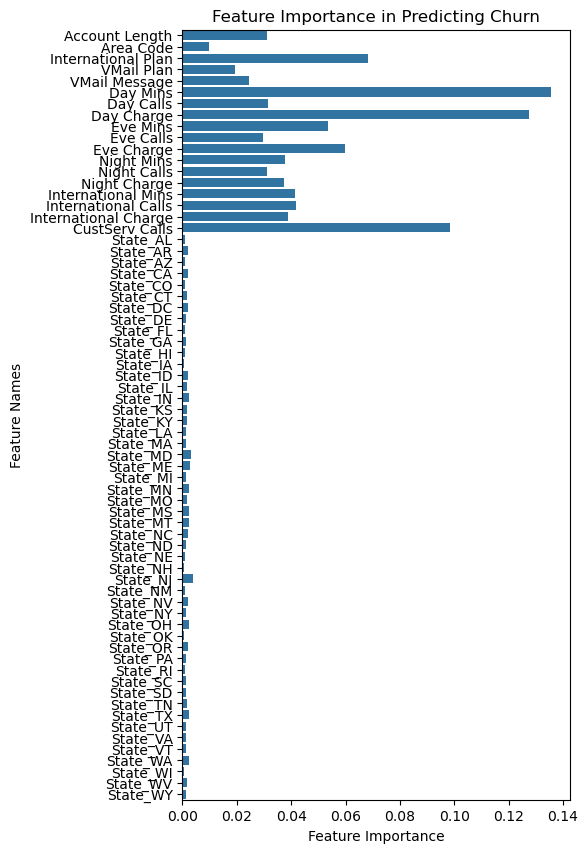

In [46]:
plt.figure(figsize=(5, 10))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in Predicting Churn")
plt.show()


In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [61]:
!pip install imbalanced-learn xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.1/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 653.6 kB/s eta 0:03:11
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:59
   ---------------------------------------- 0.3/124.9 MB 1.2 MB/s eta 0:01:44
   ---------------------------------------- 0.5/124.9 MB 1.4 MB/s eta 0:01:31
   ---------------------------------------- 0.6/124.9 MB 1.5 MB/s eta 0:01:25
   ---------------------------------------- 0.6/124.9 MB 1.4 MB/s eta 0:01:26
   ---------------------------------------- 0.7/124.9 MB 1.4 MB/s eta 0:01:26
 

### Model building using XGBClassifier

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred = xgb_model.predict(X_test)
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9534632034632035

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       799
           1       0.84      0.81      0.82       125

    accuracy                           0.95       924
   macro avg       0.91      0.89      0.90       924
weighted avg       0.95      0.95      0.95       924


Confusion Matrix:
 [[780  19]
 [ 24 101]]


### Accuracy:95%

In [53]:
df["Total Mins"] = df["Day Mins"] + df["Eve Mins"] + df["Night Mins"] + df["International Mins"]
df["Total Calls"] = df["Day Calls"] + df["Eve Calls"] + df["Night Calls"] + df["International Calls"]
df["Avg Call Duration"] = df["Total Mins"] / df["Total Calls"]


In [55]:
correlation_target = df.corr()[["Total Mins", "Total Calls"]].sort_values(by="Total Mins", ascending=False)
print(correlation_target)


                Total Mins  Total Calls
Total Mins        1.000000     0.020151
Day Charge        0.498044     0.007759
Day Mins          0.498041     0.007760
Night Mins        0.497634     0.012232
Night Charge      0.497625     0.012240
...                    ...          ...
State_CO         -0.022439    -0.024574
State_SC         -0.025181     0.002537
State_WI         -0.025826    -0.022157
CustServ Calls   -0.027095    -0.014046
State_LA         -0.032952     0.012659

[72 rows x 2 columns]


In [77]:
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 660.6 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.5 MB 656.4 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 819.2 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.5 MB 981.9 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.5 MB 1.1 MB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.5 MB 1.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 1.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 1.0 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 1.0 MB/s eta 0:00:01
   ------------ 

###  Model building using  LightGBM 

In [63]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
print(classification_report(y_test, y_pred))



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 531, number of negative: 3162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2534
[LightGBM] [Info] Number of data points in the train set: 3693, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143786 -> initscore=-1.784198
[LightGBM] [Info] Start training from score -1.784198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

### Accuracy:96%

### Model building using LogisticRegression

In [65]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       799
           1       0.43      0.19      0.27       125

    accuracy                           0.86       924
   macro avg       0.66      0.58      0.59       924
weighted avg       0.82      0.86      0.83       924



### Accuracy: 86%

### Model building using CatBoostClassifier

In [141]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 326.8 kB/s eta 0:05:12
   ---------------------------------------- 0.1/101.7 MB 653.6 kB/s eta 0:02:36
   ---------------------------------------- 0.2/101.7 MB 871.5 kB/s eta 0:01:57
   ---------------------------------------- 0.2/101.7 MB 953.7 kB/s eta 0:01:47
   ---------------------------------------- 0.2/101.7 MB 835.2 kB/s eta 0:02:02
   ---------------------------------------- 0.3/101.7 MB 840.4 kB/s eta 0:02:01
   ---------------------------------------- 0.3/101.7 MB 910.2 kB/s eta 0:01:52
   ---------------------------------------- 0.4/101.7 MB 849.3 kB/s eta 0:02:00
   ---------------------------------------- 0.4/101.7 MB 917.0 kB/s e

In [57]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=200, learning_rate=0.05, depth=5, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

y_pred = catboost_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       799
           1       0.93      0.74      0.83       125

    accuracy                           0.96       924
   macro avg       0.95      0.87      0.90       924
weighted avg       0.96      0.96      0.96       924



### Accuracy:96%

####  Predicting the output with sample data

In [67]:
import pandas as pd
import numpy as np
feature_names = X_train.columns.tolist()
test_data = pd.DataFrame(np.zeros((1, len(feature_names))), columns=feature_names)
test_data['Account Length'] = 100
test_data['Area Code'] = 415  # Example area code
test_data['International Plan'] = 1  # 1 for Yes, 0 for No
test_data['VMail Plan'] = 0  # 1 for Yes, 0 for No
test_data['VMail Message'] = 10
test_data['Day Mins'] = 150.5
test_data['Day Calls'] = 100
test_data['Day Charge'] = 12.5
test_data['Eve Mins'] = 200.3
test_data['Eve Calls'] = 120
test_data['Eve Charge'] = 17.0
test_data['Night Mins'] = 180.2
test_data['Night Calls'] = 110
test_data['Night Charge'] = 8.5
test_data['International Mins'] = 20.4
test_data['International Calls'] = 5
test_data['International Charge'] = 3.2
test_data['CustServ Calls'] = 3
test_data['Total Mins'] = 551.4
test_data['Total Calls'] = 330
test_data['Avg Call Duration'] = 5.5
state_column = 'State_TX'  # Example state
if state_column in test_data.columns:
    test_data[state_column] = 1
test_data = test_data[X_train.columns]
# Predict using the trained model
prediction = lgbm_model.predict(test_data)
print("Churn Prediction:", "Churn" if prediction[0] == 1 else "No Churn")


Churn Prediction: Churn


## Task-2:  Implementing Churn Risk Scores

In [69]:
churn_risk_score = lgbm_model.predict_proba(test_data)[:, 1]
print(f"Churn Risk Score: {churn_risk_score[0]:.2f}")


Churn Risk Score: 1.00


In [79]:
import pandas as pd

churn_risk_scores = lgbm_model.predict_proba(X_test)[:, 1]

churn_results = pd.DataFrame({  
    "Customer_Index": X_test.index, 
    "Churn_Risk_Score": churn_risk_scores,
    "Actual_Churn": y_test.values  
})

print(churn_results.head())


   Customer_Index  Churn_Risk_Score  Actual_Churn
0            2264          0.049864             0
1            1839          0.023207             0
2            2525          0.019110             0
3              23          0.018164             0
4            1831          0.524777             0


In [75]:
print(X_train.columns.tolist())


['Account Length', 'Area Code', 'International Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'International Mins', 'International Calls', 'International Charge', 'CustServ Calls', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY']


## Task-3: Introducing CHURN-FLAG for prediction

In [81]:
import pandas as pd
threshold = 0.5
churn_results["CHURN_FLAG"] = (churn_results["Churn_Risk_Score"] >= threshold).astype(int)
print(churn_results.head())


   Customer_Index  Churn_Risk_Score  Actual_Churn  CHURN_FLAG
0            2264          0.049864             0           0
1            1839          0.023207             0           0
2            2525          0.019110             0           0
3              23          0.018164             0           0
4            1831          0.524777             0           1


## Challenges:

#### * Missing values and inconsistent data formats.
#### * Handling extra spaces and special characters in text columns.
#### * Avoiding highly correlated features that may not add extra value.
#### * Selecting the right balance of features to improve accuracy.
#### * Deciding which features to normalize without losing useful information.
#### * Need to scale numerical columns to avoid some values dominating the model.
#### * Ensuring database connections and queries are properly executed.
#### * Handling large volumes of data efficiently.
#### * choosing the best model among lightGBM,catboost,RandomForestClassifier.
#### * Need to convert categorical data (like "International Plan" & "VMail Plan") into numerical format for the model.

## Conclusion:

#### After evaluating multiple models like RandomForestClassifier,LogisticRegression,catboost and LightGBM.

#### * The model ***RandomForestClassifier*** gives **95%** Accuracy for this case .And it Handles the Data in better way.
#### * The model  ***LogisticRegression*** gives **86%** Accuracy for this case .
####  * The model ***catboost*** gives **96%** Accuracy for this case.
##### CatBoost (Categorical Boosting) is a gradient boosting algorithm that handles categorical features efficiently without requiring extensive preprocessing. 
##### It is particularly useful in datasets like ours, where categorical data (e.g., State, International Plan, VMail Plan) plays a significant role in predicting customer churn.
##### It gives better Accuracy.
#### * The model ***LightGBM*** gives **96%** Accuracy for this case.
##### LightGBM (Light Gradient Boosting Machine) proved to be the best model for predicting telecom customer churn in this project.
##### CatBoost performed well but was slightly behind LightGBM in accuracy and efficiency.

#### LightGBM emerged as the most efficient and effective model for telecom churn prediction. It offers:

#### ✔ Faster training speed compared to RandomForest and CatBoost.
#### ✔️ Higher accuracy and better handling of large datasets.
#### ✔️ Strong performance on imbalanced data, which is common in churn prediction.

